# Fig. 4: Fiducial model P-T and chemical profiles

In [16]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import pickle
from matplotlib import colormaps as cm

In [17]:
APJ_SINGLE_COL = 3.5
APJ_DOUBLE_COL = 7.
TEXTSIZE=12

tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Scale to range of 0-1 for matplotlib
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)

In [18]:
def pt_yan2020(P, T1, P1, T2, P2):
    """Returns P-T profile using the Yan et al. 2020 parameterization."""
    # define layers and temperatures
    T = np.zeros(len(P))
    layer0 = P <= P1
    layer2 = P >= P2

    # log-linear in middle layer
    A = (T1-T2)/(np.log10(P1)-np.log10(P2))
    B =  T2 - np.log10(P2) * A
    T = np.log10(P) * A + B

    # Isothermal for upper/lower region
    T[layer0] = T1
    T[layer2] = T2
    return T

In [19]:
pressure = np.logspace(-8, 2, 100) # -6 or -8
temperature = pt_yan2020(pressure, T1=4320, P1=10**-3.10, T2=2200, P2=10**-1.7)

In [20]:
df = pd.read_pickle('../data/W189b_fastchem_1D_Yan22_chemistry.dat')
mmw = np.array(df['m(u)'])

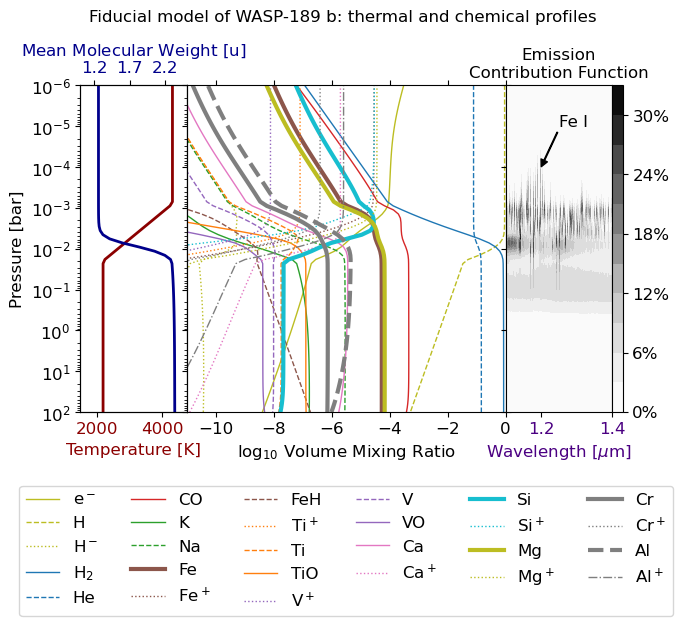

In [21]:
fig = plt.figure(figsize=(APJ_DOUBLE_COL, APJ_DOUBLE_COL/1.2))
spec = gridspec.GridSpec(ncols=4, nrows=2, figure=fig, width_ratios=[1.,3.,1.,0.1], height_ratios=[1,0.25], wspace=0.)
ax1a = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[0, 1])
ax3 = fig.add_subplot(spec[0, 2])
ax3b = fig.add_subplot(spec[0,3])
lax = fig.add_subplot(spec[1, 0:3])

ax1a.plot(temperature, pressure, color='darkred', lw=2)
ax1a.set_yscale('log')
ax1a.invert_yaxis()
ax1a.tick_params(axis ='x', labelcolor = 'darkred', labelsize=TEXTSIZE)
ax1a.set_xlim(1500,4750)
ax1a.tick_params(axis ='y', labelsize=TEXTSIZE)
ax1a.set_xlabel(r'Temperature [K]', fontsize=TEXTSIZE, color='darkred')
ax1a.set_ylabel(r'Pressure [bar]', fontsize=TEXTSIZE, color='k')

ax1b = ax1a.twiny()
ax1b.plot(mmw, pressure, color='darkblue', lw=2)
ax1b.tick_params(axis ='x', labelcolor = 'darkblue', labelsize=TEXTSIZE)
ax1b.tick_params(axis ='y', labelsize=TEXTSIZE)
ax1b.set_ylim(1e2,1e-6)
ax1b.set_xlim(1,2.5)
ax1b.set_xticks([1.2, 1.7, 2.2])
ax1b.set_xlabel(r'Mean Molecular Weight [$\mathrm{u}$]', fontsize=TEXTSIZE, color='darkblue')

species = [
    'e-',
    'H',
    'H1-',
    'H2',
    'He',
    'C1O1',
    'K',
    'Na',
    'Fe',
    'Fe1+',
    'Fe1H1',
    'Ti1+',
    'Ti',
    'O1Ti1',
    'V1+',
    'V',
    'O1V1',
    'Ca',
    'Ca1+',
    'Si',
    'Si1+',
    'Mg',
    'Mg1+',
    'Cr',
    'Cr1+',
    'Al',
    'Al1+',
]
specie_labels = [
    r'e$^-$',
    'H',
    r'H$^-$',
    r'H$_2$',
    'He',
    'CO',
    'K',
    'Na',
    'Fe',
    'Fe$^+$',
    'FeH',
    'Ti$^+$',
    'Ti',
    'TiO',
    'V$^+$',
    'V',
    'VO',
    'Ca',
    'Ca$^+$',
    'Si',
    'Si$^+$',
    'Mg',
    'Mg$^+$',
    'Cr',
    'Cr$^+$',
    'Al',
    'Al$^+$'
]

lines = {
    'e-' : (tableau20[16], '-', 1),
    'H' : (tableau20[16], '--', 1),
    'H1-' : (tableau20[16], ':', 1),
    'H2' : (tableau20[0], '-', 1),
    'He' : (tableau20[0], '--', 1),
    'C1O1': (tableau20[6], '-', 1),
    'K': (tableau20[4], '-', 1),
    'Na': (tableau20[4], '--', 1),
    'O1Ti1': (tableau20[2], '-', 1),
    'O1V1': (tableau20[8], '-', 1),
    'Fe': (tableau20[10], '-', 3),
    'Fe1+': (tableau20[10], ':', 1),
    'Fe1H1': (tableau20[10], '--', 1),
    'Ti': (tableau20[2], '--', 1),
    'Ti1+': (tableau20[2], ':', 1),
    'V': (tableau20[8], '--', 1),
    'V1+': (tableau20[8], ':', 1),
    'Ca': (tableau20[12], '-', 1),
    'Ca1+': (tableau20[12], ':', 1),
    'Si': (tableau20[18], '-', 3),
    'Si1+': (tableau20[18], ':', 1),
    'Mg': (tableau20[16], '-', 3),
    'Mg1+': (tableau20[16], ':', 1),
    'Cr': (tableau20[14], '-', 3),
    'Cr1+': (tableau20[14], ':', 1),
    'Al': (tableau20[14], '--', 3),
    'Al1+': (tableau20[14], '-.', 1)
}

for n, (specie, specie_label) in enumerate(zip(species, specie_labels)):
    #print(specie, specie_label)
    if np.any(np.log10(df[specie]) > -11):
        ax2.plot(np.log10(df[specie]), df['p(bar)'], label=specie_label, ls=lines[specie][1], color=lines[specie][0], lw=lines[specie][2])
        ax2.set_yscale('log')
        ax2.invert_yaxis()
    else:
        print(specie)
ax2.set_yticklabels('')
ax2.set_ylim(1e2,1e-6)
ax2.set_xlim(-11,0)
ax2.tick_params(axis ='x', labelsize=TEXTSIZE)
ax2.set_xlabel(r'log$_{\rm{10}}$ Volume Mixing Ratio', fontsize=TEXTSIZE)

lax.axis('off')
ax2.legend(loc='upper center', bbox_to_anchor=(0.5,-0.2), ncols=6, fontsize=TEXTSIZE)
plt.suptitle('Fiducial model of WASP-189 b: thermal and chemical profiles', y =1.01, fontsize=TEXTSIZE)

ax2.tick_params(top=True, right=True)

f = '../data/ecf_W189b_pRT_1D_Yan22_chem_eq_all.pkl'
wavelengths_um, pressures, eccf = pickle.load(open(f, 'rb'))

x, y = np.meshgrid(wavelengths_um, pressures)
contour = ax3.contourf(x, np.log10(y), eccf, 10, cmap=cm['Greys'])

#ax.set_xscale('log')
ax3.set_ylim([2, -6])
ax3.set_yticks([2,0,-2,-4,-6])
ax3.set_yticklabels([])
ax3.set_xlim([wavelengths_um[0], wavelengths_um[-1]])

ax3.set_xlabel('Wavelength [$\mu$m]', size=TEXTSIZE, color='indigo')
ax3.set_title("Emission\nContribution Function", size=TEXTSIZE)
ax3.annotate(r'Fe I', xy=(1.2, -4), xytext=(1.25,-5), size=TEXTSIZE, arrowprops=dict(facecolor='black', headwidth=5, headlength=5, shrink=0.01, width=0.5))
ax3.tick_params(axis ='x', labelsize=TEXTSIZE, labelcolor = 'indigo')

cbar = plt.colorbar(mappable=contour, cax=ax3b)

# Get current ticks
ticks = cbar.get_ticks()

# Format tick labels as percentages
labels = [f'{t*100:.0f}%' for t in ticks]

# Set new tick labels
cbar.set_ticks(ticks)
cbar.set_ticklabels(labels)
cbar.ax.tick_params(labelsize=TEXTSIZE)

fname = 'Fig4_W189b_fiducial_thermal_and_chemical_profiles'
plt.savefig('../figures/'+fname+'.png', dpi=250, bbox_inches='tight')
plt.savefig('../figures/'+fname+'.pdf', bbox_inches='tight')
plt.show()